# Das erste Indexing-Verfahren: Wie funktionieren Dictionaries in Python?

In der Praxis haben wir häufig die Anwendung, Daten (_Value_) unter einem eindeutigen Schlüssel (_Key_) wie etwa einer ID abzuspeichern. Sei es die Zuordnung der ISBN Nummer zu den Daten eines Buches oder die Kundennummer zu den Kundendaten. Wie im praktischen Beispiel mit dem Telefonbuch, muss ein System entwickelt werden, um bei großen Datenmengen die Qualität des Information Retrievals zu sichern.

In [8]:
!jupyter nbconvert --to html "hash_table.ipynb"

[NbConvertApp] Converting notebook hash_table.ipynb to html
[NbConvertApp] Writing 660056 bytes to hash_table.html


Dieses Verfahren wird als Indexing bezeichnet. Darunter wird unter anderem das Verfahren verstanden, die Key-Value-Paare geschickt so zu speichern, damit sie schnell gefunden werden.

Viele Programmiersprachen stellen eine ganze Reihe an Datenstrukturen bereit. Ob in Java, C# oder Python - überall gibt es Datenstrukturen für das Speichern eines Key-Value-Paares. Manchmal heißen Sie Dictionary, manchmal Collection, HashMap oder HashTable. 

Die Idee ist immer die gleiche - der Anwender soll zu einem gegebenen Schlüssel (Key) einen Wert (value) abspeichern können. Zu einem gegebenen Key soll der zugehörige Value abgefragt werden können. Das Problem kann man daher auch als einfaches _Information Retrieval_ Problem beschreiben. Das Abspeichern eines Key-Value-Paares ist einfach, doch wie gestaltet man dies so, dass zu einem Key der richtige Value kosteneffizient gefunden wird?

Dieses Notebook vermittelt die Idee und Problemstellung von Key-Value-Datenstrukturen. Anhand simpler Beispiele werden Probleme aufgezeigt. Zuletzt wird die Implementierung der Hash Table, wie sie auch in Python zum Einsatz kommt, vorgestellt.

### Einordnung in die Pipeline

Auch wenn Dictionaries zur Speicherung von Daten genutzt werden, soll es hier nicht um die Persistenz von Daten (Schritt 4) gehen. In diesem Notebook liegt der Fokus allein auf Schritt 3, der Vorstellung eines ersten Index-Verfahrens - dem Funktionsprinzip der Python-Dictionaries.

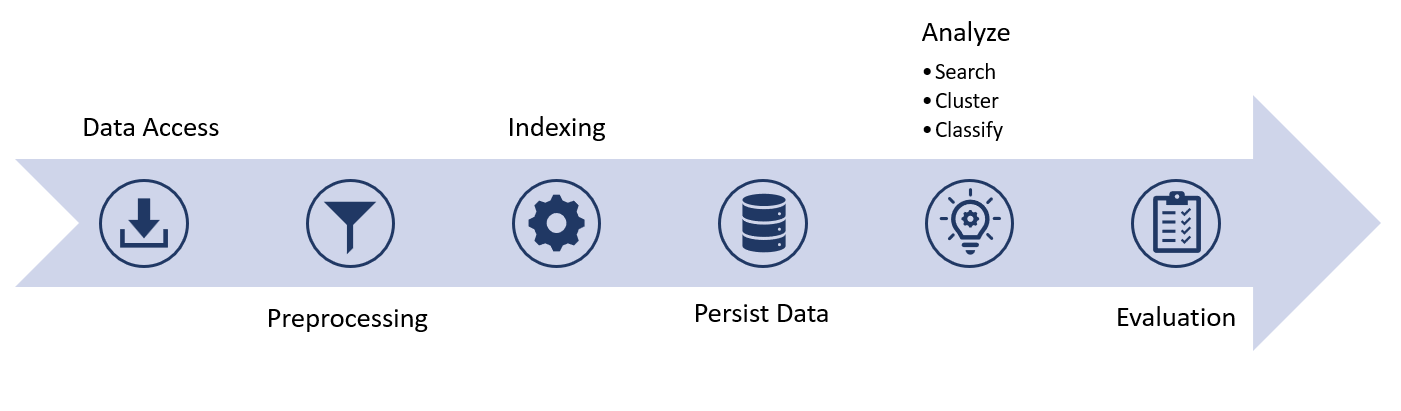

## Inhalt

1. Eine simple, naive Dictionary Implementierung
2. Eine kleine Verbessung von 1.
3. Alphanumerisch-indexiertes Dictionary
4. Hash Table (Python Dictionary)

### 1. Einfaches Beispiel

Beschreibung:
* Key-Value-Paare werden als Liste in einer Liste aller Key-Value-Paare gespeichert. 
* der erste Wert einer zweier-Liste ist immer der Key, der zweite der Value. 
* Wird ein neues Paar hinzugefügt, wird eine neue zweier-Liste angelegt und an die Gesamtliste angehängt (``add1``).
* Die Funktion ``get1`` implementiert die Abfrage. 

Um den passenden Value zu einem Key abzufragen, muss die gesamte Liste iteriert werden. Jedes Mal wird überprüft ob der aktuelle Key der Iteration dem gegebenen Key entspricht. Ist dies der Fall, wird der aktuelle Value ausgegeben.


**Wo ist hier das Problem?**

Ganz klar, bei der Effizienz der Abfrage. Bei der Abfrage eines beliebigen Keys müssen im schlechtesten Fall _alle_ Keys auf eine Übereinstimmung geprüft werden. Wenn $n$ die Anzahl an Einträgen ist, dann werden im Schnitt $\frac{1+n}{2}$ Überprüfungen auf den richtigen Key durchgeführt. Angenommen natürlich man fragt alle Keys gleichverteilt ab.

In [35]:
my_dict = []

def add1(key, value):
    """
    We always append a list of 2 items to the data structure. First value is our key, second the value.
    """
    my_dict.append([key, value])


def get1(key):
    for entry in my_dict:
        if entry[0] == key:
            return entry[1]
    raise KeyError(f"Key {key} not in dictionary.")

#### Test mit Daten aus dem Countries-Korpus

In [3]:
add1("deutschland", "berlin")
add1("frankreich", "paris")

get1("frankreich")

'paris'

In [4]:
# this should yield a KeyError, thus spanien is not contained in the keys.
get1("spanien")

KeyError: 'Key spanien not in dictionary.'

## 2. Etwas besser

Im diesen Beispiel werden zwei Listen für die Speicherung der Daten angelegt:
* ``dict_keys`` speichert hier ausschließlich die Keys
* ``dict_values`` speichert ausschließlich die Values

Die Idee ist nun, dass der  Key immer an derselben Position innerhalb der ``dict_keys`` Liste ist, wie der zugehörige Value in der ``dict_values`` Liste. Der Gewinn dieser Implementierung liegt bei der Abfrage: hier kann auf die ``index``-Methode der Python-Liste zurückgegriffen werden (Zeile 17).

In [ ]:
dict_keys = []
dict_values = []

def add2(key, value):
    """
    We add a key value pair by adding the value to a list of all values and the key to a list of all keys. It is important that key and value must always be at the same position in both lists. If the key is already present, we overwrite its value with the new one.
    """
    if key not in dict_keys:
        dict_keys.append(key)
        dict_values.append(value)
    else:
        idx = dict_keys.index(key)
        dict_values[idx] = value


def get2(key):
    idx = dict_keys.index(key)
    return dict_values[idx]

# 3. Alphabetisch-sortierte Speicherung

Nun wollen wir die Sache anders angehen und uns der Implementierung, wie sie in Python auch zu finden ist annähern. Die grundlegende Idee dabei ist die Speicherung der Keys in einzelnen Datenspeichern nach festgelegten Eigenschaften. Hier legen wir die Eigenschaft auf das erste Zeichen eines Keys fest. Der Vorteil bei dieser Methode ist es, dass bei der Abfrage direkt nur die Keys des entsprechenden Buckets durchsucht werden müssen.


 Dafür überlegen wir uns das folgende Verfahren:
* Die Keys werden von nun an nach ihrem ersten Zeichen betrachtet. Für alle Zeichen, die es gibt, wird ein _eigener_ Datenspeicher für jeweils die Keys und Values angelegt (wie im 2. Beispiel). Diese werden als _Buckets_ bezeichnet.
* Wird ein Key-Value-Paar hinzugefügt, wird es dem Bucket des jeweiligen Anfangszeichens des Keys hinzugefügt.
* Bei der Abfrage (Query) wird nur der Bucket des Anfangsbuchstabens des Keys von der Abfrage durchsucht.
* Alle numerischen Zeichen sollen in einem Bucket zusammengefasst werden.


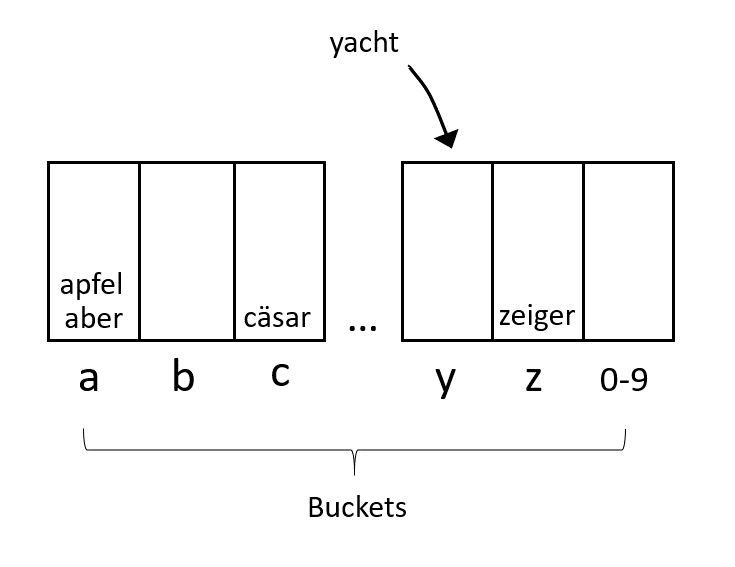

### Aufgabe

1. Implementieren Sie die Speichermethode nach der Anleitung von oben. **Dabei ist es verboten, Python-Dictionaries zu nutzen (schließlich wollen wir ja selbst eines bauen). Nutzen Sie auch keine externen Python-Module.** Nutzen Sie die vorgegeben, bisher leeren Methoden. Es soll eine Funktion ``add(key, value)`` und eine Funktion ``get(key)`` geben.
2. Testem Sie Ihre Implementierung auch mit den Key-Value-Paaren aus der countries_vocab.csv. Die Keys sind dabei alle Tokens aus dem Countries-Korpus, die Values die Anzahl ihres Auftretens.
3. Wo sehen Sie Probleme?

In [6]:
import os
import re

os.chdir("d:\\Eigene Dateien\\Dokumente\\Dokumente\\Studium\\HdM\\Sem4\\IR")
bucket_list = []


def add(key, value):
    i=key[0]
    if type(i) is list and i in bucket_list:
        i.extend([key, value])
    else:
        i = []
        i.extend([key, value])
        bucket_list.append(i)
#        print("true") greift

def get(key):
    x=key[0]
    x=[]
    if x in bucket_list:
#        print("bad") greift nicht
        keyindex=x.index(key)
        print("Der Wert von Schlüssel "+key+" ist:" +x[keyindex+1])

with open("countries_vocab.csv", "r", encoding = "utf-8") as f:
    next(f)
    for line in f:
            g=line.split(',')
            add(g[0],g[1])

get("Land")

#nicht funktionell, letzte Schritte funktionieren nicht           

## Die Hash-Table


Das Prinzip der Hash Table wird in Python-Dictionaries umgesetzt. Der Datenspeicher gleicht dem Prinzip in der zuvor vorgestellten Methode für die Indexierung, jedoch wird hier als Eigenschaft für die indexierte Speicherung nicht die Wert des ersten Zeichens eines Values genutzt, sondern der _Hash_ der Values.

#### Was ist ein Hash?

Unter Hashing versteht man das Bilden einer kryptografischen Prüfsumme. Sie ist das Ergebnis eines speziellen Hashing Algorithmuses (es gibt viele verschiedene). Hashing ist ein überaus wichtiges Werkzeug in der IT-Security, zuletzt erlangte es jedoch auch im Kontext von Krypto-Währungen und der Blockchain mediales Aufsehen. Die Idee eines Hashes basiert auf Folgendem:
* berechne für eine beliebig große Datenmenge eine Prüfsumme zu.
* Die Prüfsumme hat immer die gleiche Länge, also besteht immer aus einer festen Anzahl Zeichen.
* für gleiche Werte wird immer die gleiche Prüfsumme ausgegeben.
* bereits eine kleine Änderung in den eingegebenen Datenmenge soll eine große Änderung auf die Prüfsumme haben.
* es gibt keine Möglichkeit vom Hash auf den ursprünglichen Wert zu schließen.


Mit Hashing lassen sich also zwei Datenmengen auf einer rdeuzierten Ebene vergleichen. In Python können einfache Hashes mit der mitgelieferten Funktion ``hash`` berechnet werden. Wir machen ein paar Beispiele:

In [4]:
print("Die Prüfsumme von hallo ist:", hash("hallo"))

Die Prüfsumme von hallo ist: 3247912671867000804


In [5]:
# the hash of hallo plus an additional l is totally different
hash("halllo")

5449254177961134023

Ein Hash in Python hat die Länge:

In [27]:
len(str(hash("hallo")))

19

Da der Hash positive und negative Werte annehmen kann, sind also $ 10^{38} $ Werte möglich. Die Anzahl an verschiedener Möglichkeiten sind:

In [28]:
10**38

100000000000000000000000000000000000000

Es ist wichtig das Risiko zu minimieren, dass zwei verschiedene Daten denselben Hash ergeben. Dies wird als Kollision bezeichnet. Je länger der Hashwert an sich ist, desto mehr Kombinationen der Prüfsumme sind möglich, ergo sinkt das Risiko von Kollisionen.

In Python wird zudem beim Vergleich von Objekten mit dem Operator ``is`` der Hash der beiden Objekte verglichen, also:
``a is b`` entspricht ``hash(a) == hash(b)`` unter der Haube.

#### Einsatz von Hashes in der Hash Table

Bei der Initialisierung einer Hash Table wird zunächst die Bucketgröße $C$ (Capacity) festgelegt und entsprechend nummeriert angelegt.

Die Hash Table macht sich die Eigenschaften von Hashing zu nutze. Soll ein Key gespeichert werden, wird zunächst sein Hash berechnet. Die Verteilung der Keys $k$ entsprechend seines Hashes auf einen Bucket geschieht nach folgendem Prinzip:
$$ bucket = hash(k)\mod C $$
$mod$ bedeutet Modulo, man kann es sich vorstellen wie beim Teilen mit Rest: 10 mod 3 ergibt 1, also was ist der ganzzahlige Rest beim Teilen von 10 durch 3? In Python wird dafür der ``%``-Operator genutzt.

In [12]:
# Beispiel
10 % 3

1

Auf diese Weise ist es der Hash Table möglich, beliebige Daten - nicht nur Strings wie im Beispiel zuvor - zu indexieren.

#### Implementierung der Hash Table

* Es wird die Anzahl Buckets erstellt, die durch den Parameter ``capacity`` konfiguriert wurde.
* Zunächst ist jeder Bucket eine leere Liste. 
* Nach der Zuordnung zu einem Bucket basierend auf dem Hash des Keys, wird das Key-Value-Paar dem Bucket hinzugefügt.    
* Ergänzung: Das Key-Value-Paar wird in einem Node-Objekt gespeichert. Dieses Node-Objekt wird als Attribut an das oberste Key-Value-Node-Objekt des Buckets angehängt (``next``-Attribut der Node Klasse).
* So entsteht eine Verkettung der einzelnen Datenbestände innerhalb eines Buckets. Diese Datenstruktur bezeichnet man als _Linked List_. 

**Warum der Aufwand?** Bei der Abfrage eines Values zu einem Key, wird jeweils über die Verkette Liste innerhalb eines Buckets iteriert. Dies verbessert die Performance.

Da wir nun wissen, dass alles was in ein Python-Dictionary als Key gespeichert wird, gehasht wird, verstehen wir auch die folgende Fehlermeldung:

In [42]:
test_list = [1, 2, 3]
test_dict = {test_list: 1}

TypeError: unhashable type: 'list'

Diesen Fehler wird bestimmt der ein oder andere schon einmal bekommen haben. Eine Liste ist also "unhashable". Ganz einfach: jeder Zeit können der Liste neue Werte hinzugefügt werden, wodurch sich ihr Hashwert verändern würde. Daher sind Listen als Key in einem Dictionary ungeeignet und deshalb verboten, da die Wertzuweisung dann nicht mehr eindeutig wäre. Ebenso verhält es sich mit Dictionaries und Sets.

#### Nun aber wirklich zur Implementierung der Hash Table

In [ ]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

    def __str__(self):
        return f"{self.key}:{self.value}"

In [32]:
class HashTable:

    def __init__(self, capacity=3):
        self.capacity = capacity
        self.buckets = [None] * self.capacity
        print(f"Created Hash Table with {self.capacity} buckets")

    def get_index(self, key):
        h = hash(key)
        return h % self.capacity

    def add(self, key, value):
        index = self.get_index(key)
        node = self.buckets[index]
        if node is None:
            self.buckets[index] = Node(key, value)
        else:
            while node.next is not None:
                node = node.next
            node.next = Node(key, value)
        print(f"Added key {key} to bucket {index}")

    def get(self, key):
        index = self.get_index(key)
        node = self.buckets[index]
        while node.key != key:
            node = node.next
        return node.value

    def print_bucket(self, index):
        print(self.buckets)
        node = self.buckets[index]
        while node is not None:
            print(node)
            node = node.next

Testen der Hash Table:

In [33]:
table = HashTable(capacity=5)

table.add("deutschland", "berlin")
table.add("frankreich", "paris")
table.add("spanien", "madrid")
table.add("japan", "tokyo")
table.add("süd afrika", "pretoria")

Created Hash Table with 5 buckets
Added key deutschland to bucket 0
Added key frankreich to bucket 1
Added key spanien to bucket 3
Added key japan to bucket 1
Added key süd afrika to bucket 3


In [10]:
table.get("japan")

'tokyo'

In [31]:
table.buckets

 None,
 None]

In [12]:
table.get("süd afrika")

'pretoria'

In [34]:
table.print_bucket(0)

[<__main__.Node object at 0x000001B74B2D0E08>, <__main__.Node object at 0x000001B74B2D0108>, None, <__main__.Node object at 0x000001B74B2D0E88>, None]
deutschland:berlin
